# Implementing the Speech Enhancement GAN

### Standard Imports

In [4]:
# standard imports
import tensorflow as tf            # tensorflow importing
from tensorflow.keras.layers import Conv1D,Conv1DTranspose,Concatenate,Input, PReLU
import numpy as np                 # numpy package importing
import matplotlib.pyplot as plt    # matplotlib package importing
import IPython.display
import glob
from tqdm.notebook import tqdm     # a library used to visualize progress as a dynamic filling bar 
import librosa.display              # a python package used to do analysis on audio data and visualize it

## Building the model

### Generator

- The model is built as described in the SEGAN paper which comprises of 22 1d convolution layers (both conv1D and conv1DTranspose) 
- Each conv1D layer is followed by a PReLU activtion layer

In [12]:
inp = Input(shape=(16384,1))
# c1 = Conv1D(16,32,2,'same',activation='relu')(inp)
# c2 = Conv1D(32,32,2,'same',activation='relu')(c1)
# c3 = Conv1D(32,32,2,'same',activation='relu')(c2)
# c4 = Conv1D(64,32,2,'same',activation='relu')(c3)
# c5 = Conv1D(64,32,2,'same',activation='relu')(c4)
# c6 = Conv1D(128,32,2,'same',activation='relu')(c5)
# c7 = Conv1D(128,32,2,'same',activation='relu')(c6)
# c8 = Conv1D(256,32,2,'same',activation='relu')(c7)
# c9 = Conv1D(256,32,2,'same',activation='relu')(c8)
# c10 = Conv1D(512,32,2,'same',activation='relu')(c9)
# c11 = Conv1D(1024,32,2,'same',activation='relu')(c10)

c1 = Conv1D(16,32,2,'same')(inp)
c1 = PReLU()(c1)
c2 = Conv1D(32,32,2,'same')(c1)
c2 = PReLU()(c2)
c3 = Conv1D(32,32,2,'same')(c2)
c3 = PReLU()(c3)
c4 = Conv1D(64,32,2,'same')(c3)
c4 = PReLU()(c4)
c5 = Conv1D(64,32,2,'same')(c4)
c5 = PReLU()(c5)
c6 = Conv1D(128,32,2,'same')(c5)
c6 = PReLU()(c6)
c7 = Conv1D(128,32,2,'same')(c6)
c7 = PReLU()(c7)
c8 = Conv1D(256,32,2,'same')(c7)
c8 = PReLU()(c8)
c9 = Conv1D(256,32,2,'same')(c8)
c9 = PReLU()(c9)
c10 = Conv1D(512,32,2,'same')(c9)
c10 = PReLU()(c10)
c11 = Conv1D(1024,32,2,'same')(c10)
c11 = PReLU()(c11)

dc1 = Conv1DTranspose(1024,32,1,padding='same')(c11)
conc = Concatenate()([c11,dc1])
dc2 = Conv1DTranspose(512,32,2,padding='same')(conc)
conc = Concatenate()([c10,dc2])
dc3 = Conv1DTranspose(256,32,2,padding='same')(conc)
conc = Concatenate()([c9,dc3])
dc4 = Conv1DTranspose(256,32,2,padding='same')(conc)
conc = Concatenate()([c8,dc4])
dc5 = Conv1DTranspose(128,32,2,padding='same')(conc)
conc = Concatenate()([c7,dc5])
dc6 = Conv1DTranspose(128,32,2,padding='same')(conc)
conc = Concatenate()([c6,dc6])
dc7 = Conv1DTranspose(64,32,2,padding='same')(conc)
conc = Concatenate()([c5,dc7])
dc8 = Conv1DTranspose(64,32,2,padding='same')(conc)
conc = Concatenate()([c4,dc8])
dc9 = Conv1DTranspose(32,32,2,padding='same')(conc)
conc = Concatenate()([c3,dc9])
dc10 = Conv1DTranspose(32,32,2,padding='same')(conc)
conc = Concatenate()([c2,dc10])
dc11 = Conv1DTranspose(16,32,2,padding='same')(conc)
conc = Concatenate()([c1,dc11])
dc12 = Conv1DTranspose(1,32,2,padding='same')(conc)
conc = Concatenate()([inp,dc12])
dc13 = Conv1DTranspose(1,32,1,padding='same',activation='linear')(conc)
generatormodel = tf.keras.models.Model(inp,dc13)

In [13]:
generatormodel.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 16384, 1)]   0           []                               
                                                                                                  
 conv1d_33 (Conv1D)             (None, 8192, 16)     528         ['input_5[0][0]']                
                                                                                                  
 p_re_lu_22 (PReLU)             (None, 8192, 16)     131072      ['conv1d_33[0][0]']              
                                                                                                  
 conv1d_34 (Conv1D)             (None, 4096, 32)     16416       ['p_re_lu_22[0][0]']             
                                                                                            

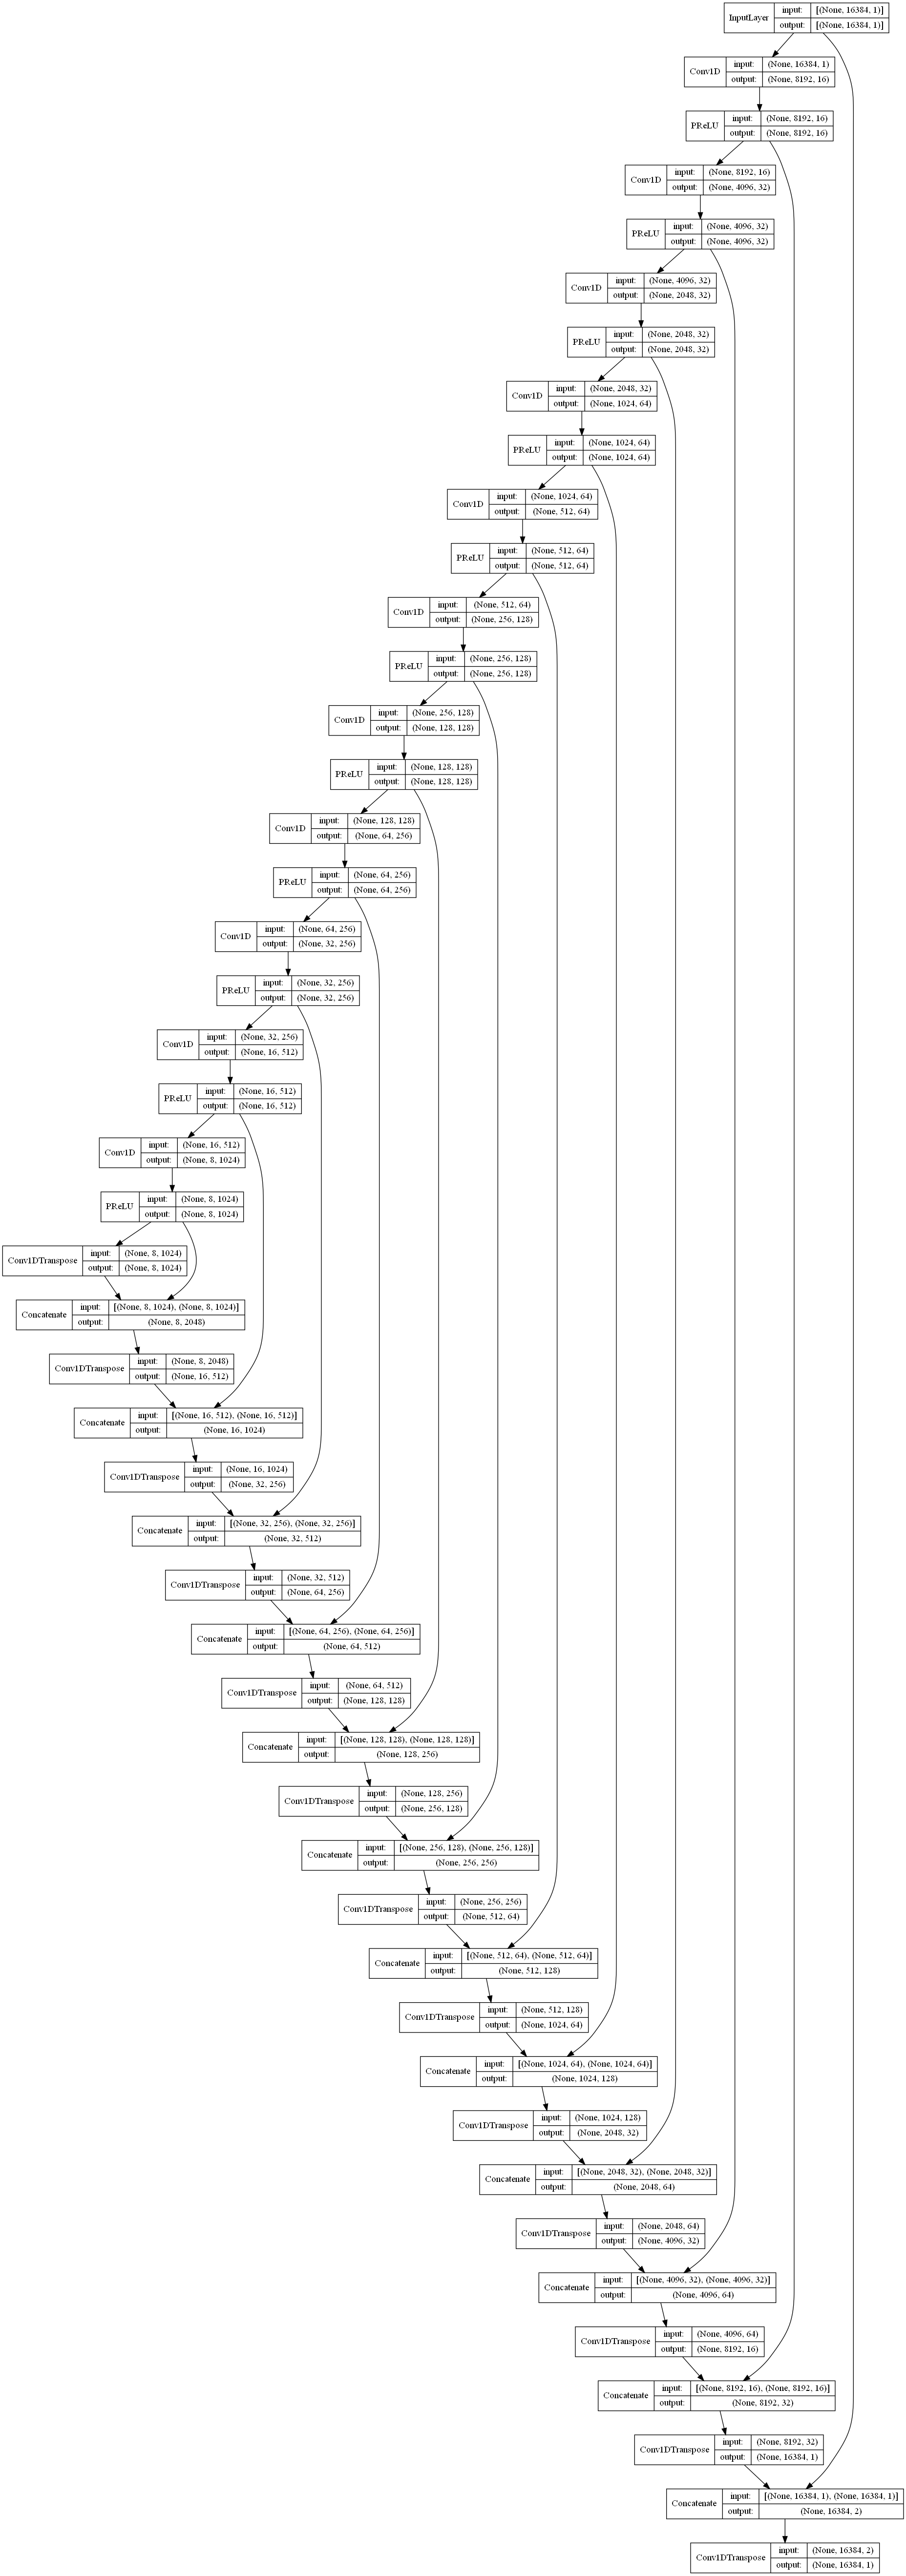

In [9]:
tf.keras.utils.plot_model(generatormodel,show_shapes=True,show_layer_names=False)